# Speech Emotion Recognition

## importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Kinds of Audio Features

In [3]:
happy_audio_path =r"C:\Users\karth\Documents\karthik\archive3\AudioWAV\1001_DFA_HAP_XX.wav"
sad_audio_path = r"C:\Users\karth\Documents\karthik\archive3\AudioWAV\1001_DFA_SAD_XX.wav"

In [4]:
def audio_display_and_waveshow(audio_path):
    au_obj = ipd.Audio(audio_path)
    audio, sr = librosa.load(audio_path, sr=None, res_type='kaiser_fast')
    
    plt.figure(figsize=(10, 6))
    librosa.display.waveshow(audio, alpha=0.7)
    plt.title(audio_path.split("/")[-1])
    plt.show()

    # Display the audio for listening
    display(au_obj)

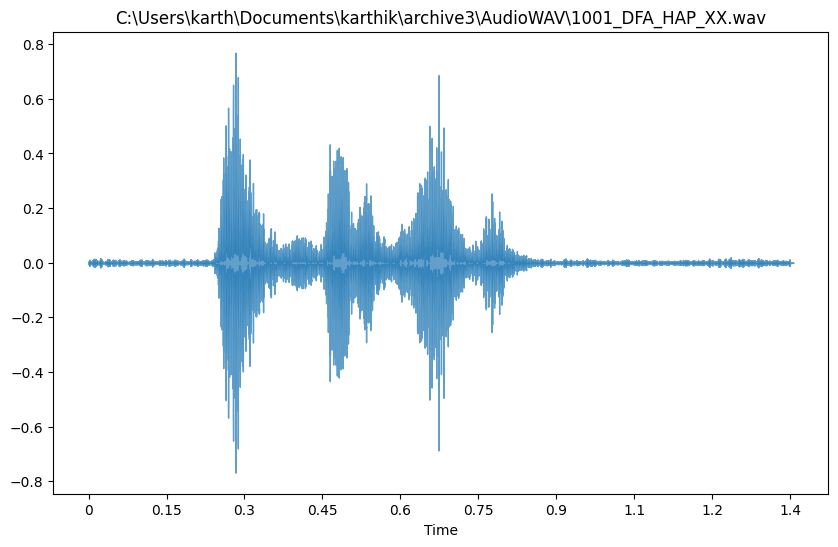

In [5]:
audio_display_and_waveshow(happy_audio_path)

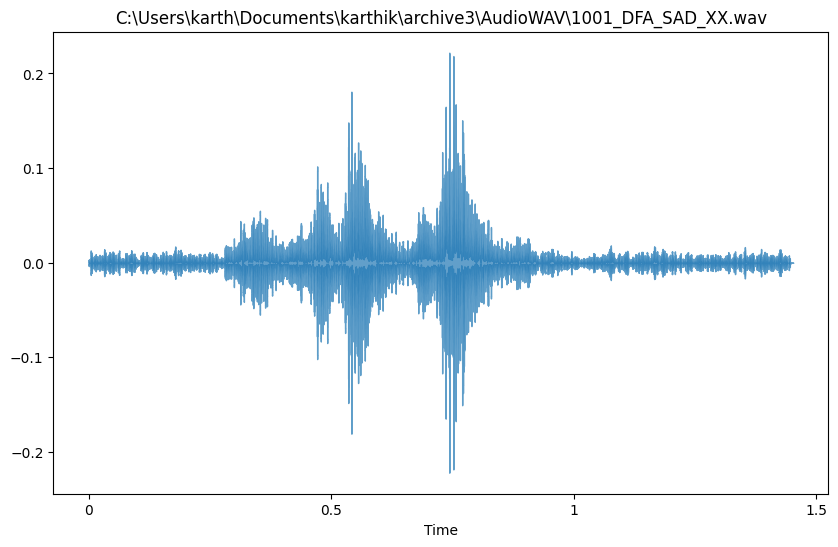

In [6]:
audio_display_and_waveshow(sad_audio_path)

**Amplitude Envelope Feature**

In [7]:
def Amplitude_Envelope(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path, sr=None, res_type='kaiser_fast')
    amplitude_envelope = np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_len)])
    
    frames = range(0, len(amplitude_envelope))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise:
        plt.figure(figsize=(10, 6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, amplitude_envelope, color='r')
        plt.title(audio_path.split("/")[-1] + " Amplitude Envelope")
        plt.show()
    
    return amplitude_envelope



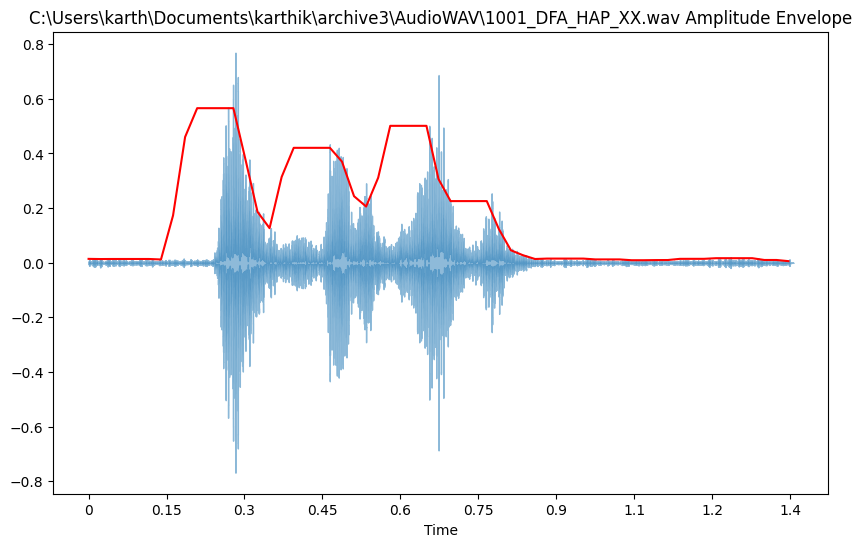

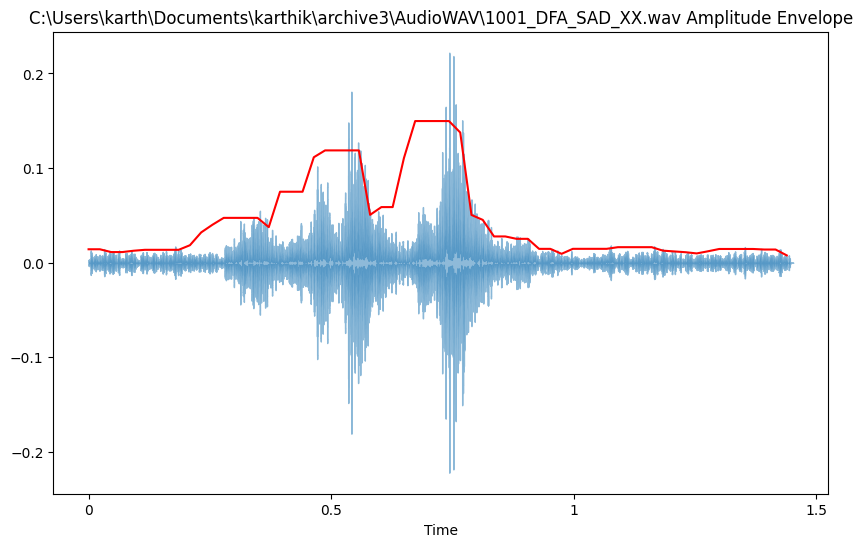

In [8]:
happy_AE = Amplitude_Envelope(happy_audio_path, frame_size=2048, hop_len=512)
sad_AE = Amplitude_Envelope(sad_audio_path, frame_size=2048, hop_len=512)

**Root Mean Square Energy Feature**

In [9]:
def Root_Mean_Square_Energy(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path, sr=None, res_type='kaiser_fast')
    rms_energy = librosa.feature.zero_crossing_rate(signal, frame_length=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(rms_energy))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, rms_energy, color='r')
        plt.title(audio_path.split("/")[-1] + " Root Mean Square Energy")
        plt.show()
    
    return rms_energy


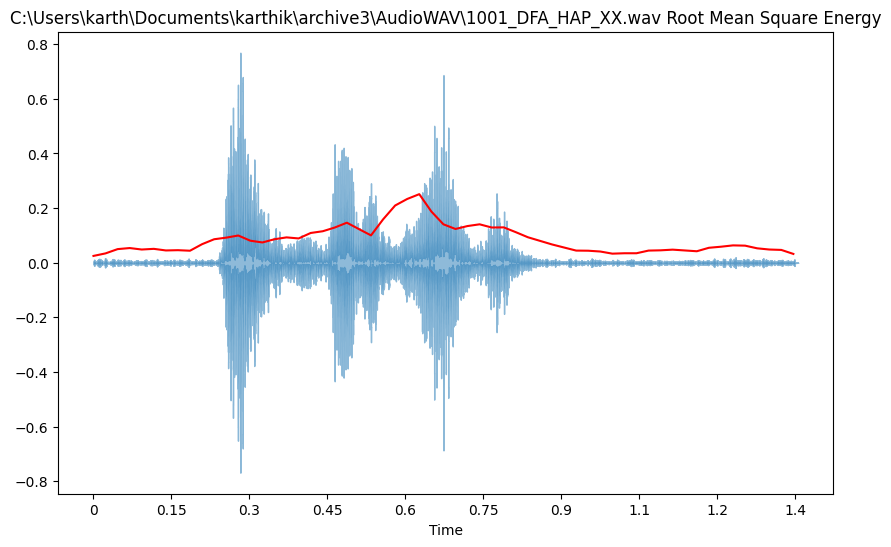

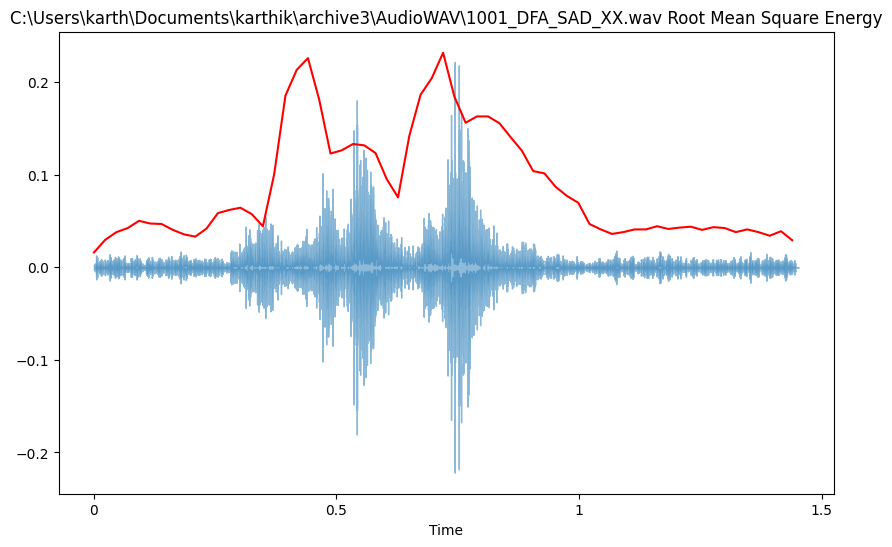

In [10]:
happy_rmse = Root_Mean_Square_Energy(happy_audio_path, frame_size=2048, hop_len=512)
sad_rmse = Root_Mean_Square_Energy(sad_audio_path, frame_size=2048, hop_len=512)

**Zero Crossing Rate Feature**

In [11]:
def Zero_Crossing_Rate(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path, sr=None, res_type='kaiser_best')
    zcr = librosa.feature.zero_crossing_rate(signal, frame_length=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(zcr))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, zcr, color='r')
        plt.title(audio_path.split("/")[-1] + " Zero Crossing Rate")
        plt.show()
    
    return zcr


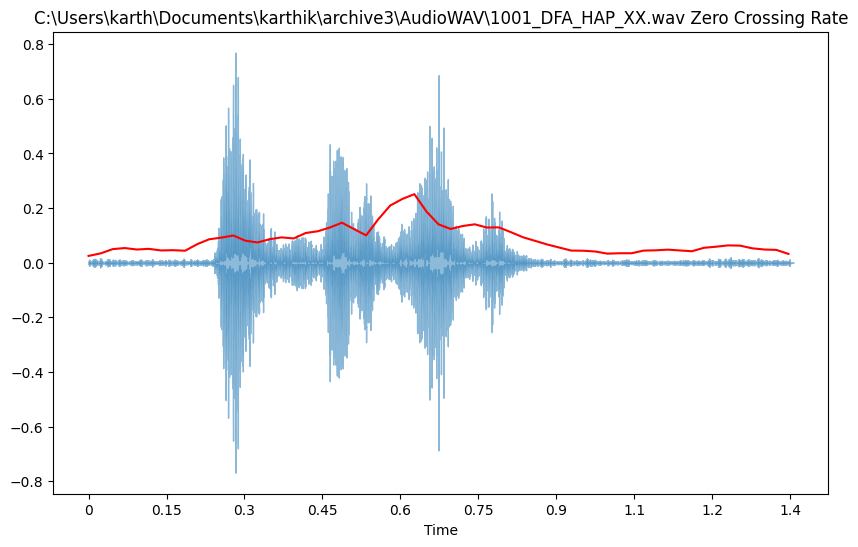

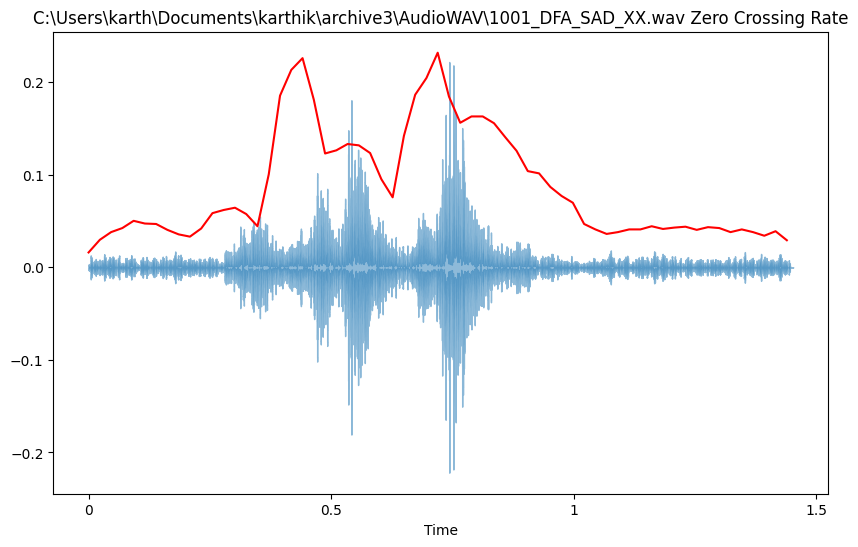

In [12]:
happy_zcr = Zero_Crossing_Rate(happy_audio_path, frame_size=2048, hop_len=512)
sad_zcr = Zero_Crossing_Rate(sad_audio_path, frame_size=2048, hop_len=512)

**Spectral Centroid Feature**

In [13]:
def Spectral_Centroid(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path, sr=None, res_type='kaiser_best')
    spectral_centroid = librosa.feature.zero_crossing_rate(signal, frame_length=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(spectral_centroid))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, spectral_centroid, color='r')
        plt.title(audio_path.split("/")[-1] + " Spectral Centroid")
        plt.show()
    
    return spectral_centroid


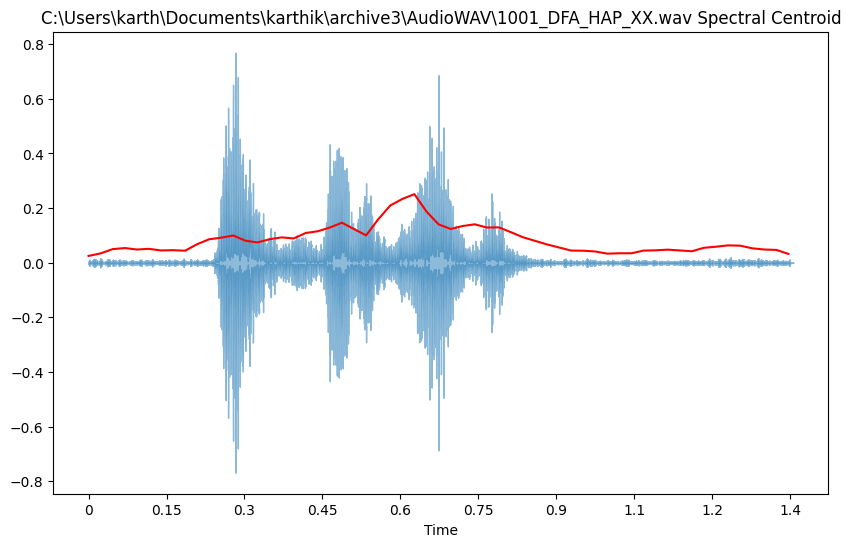

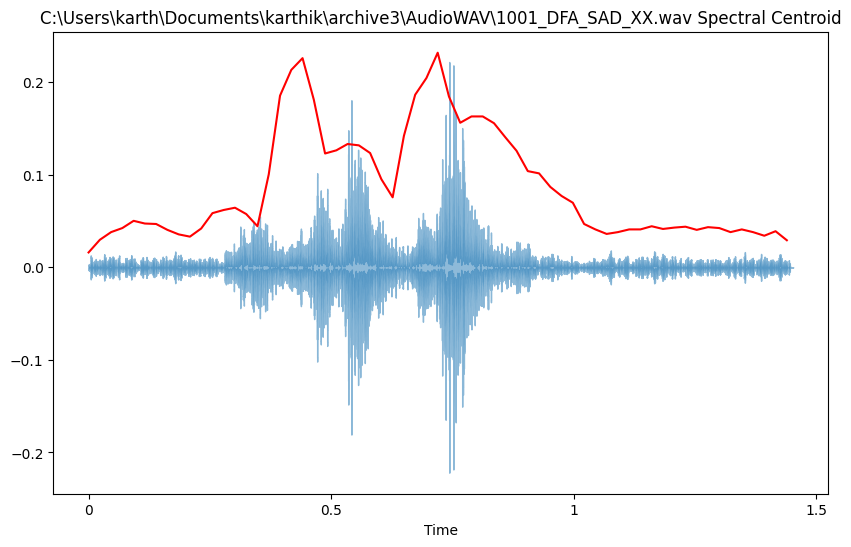

In [14]:
happy_spec_cntr = Spectral_Centroid(happy_audio_path, frame_size=2048, hop_len=512)
sad_spec_cntr = Spectral_Centroid(sad_audio_path, frame_size=2048, hop_len=512)

**Spectral Bandwidth Feature**

In [19]:
def Spectral_Bandwidth(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path, sr=None, res_type='kaiser_best')
    spectral_bandwidth = librosa.feature.zero_crossing_rate(signal, frame_length=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(spectral_bandwidth))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, spectral_bandwidth, color='r')
        plt.title(audio_path.split("/")[-1] + " Spectral Bandwidth")
        plt.show()
    
    return spectral_bandwidth


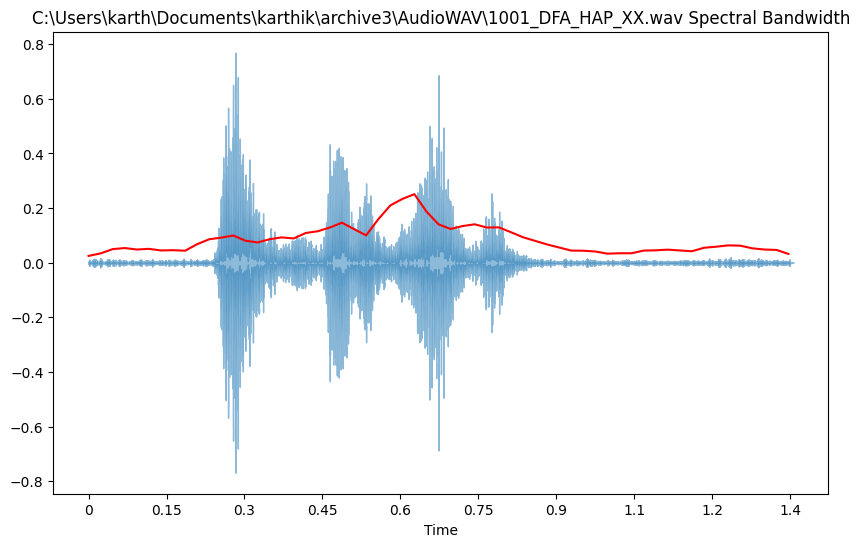

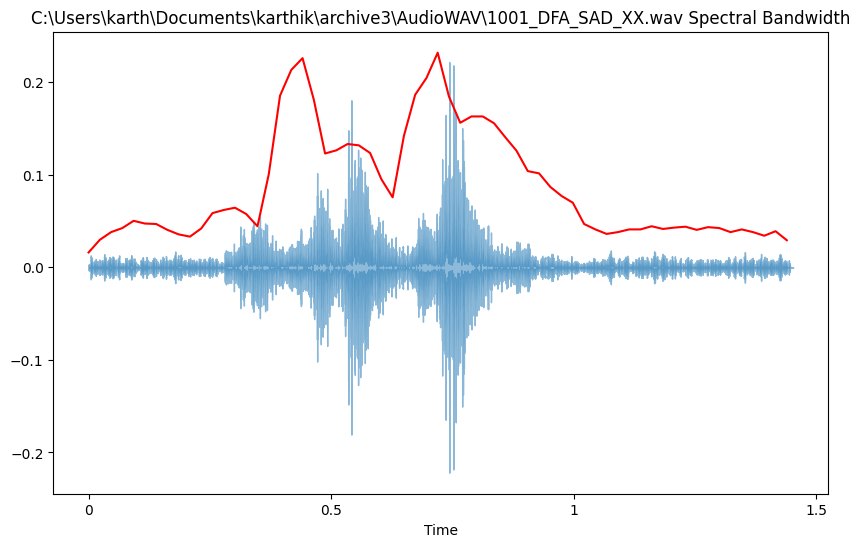

In [20]:
happy_spec_bw = Spectral_Bandwidth(happy_audio_path, frame_size=2048, hop_len=512)
sad_spec_bw = Spectral_Bandwidth(sad_audio_path, frame_size=2048, hop_len=512)

**Band Energy Ratio Feature**

In [21]:
def Band_Energy_Ratio(audio_path, frame_size, hop_len, split_frequency, visualise=True):
    signal, sample_rate = librosa.load(audio_path, sr=None, res_type='kaiser_best')
    sig_stft = librosa.stft(signal, n_fft=frame_size, hop_length=hop_len)
    frequency_range = sample_rate / 2

    split_bin = int(split_frequency / frequency_range * (frame_size / 2))
    energy_bandwidth = np.sum(np.abs(sig_stft[:split_bin, :]), axis=0)
    energy_full = np.sum(np.abs(sig_stft), axis=0)
    ber = energy_bandwidth / energy_full
    
    frames = range(0, len(ber))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, ber, color='r')
        plt.title(audio_path.split("/")[-1] + " Band Energy Ratio")
        plt.show()
    
    return ber


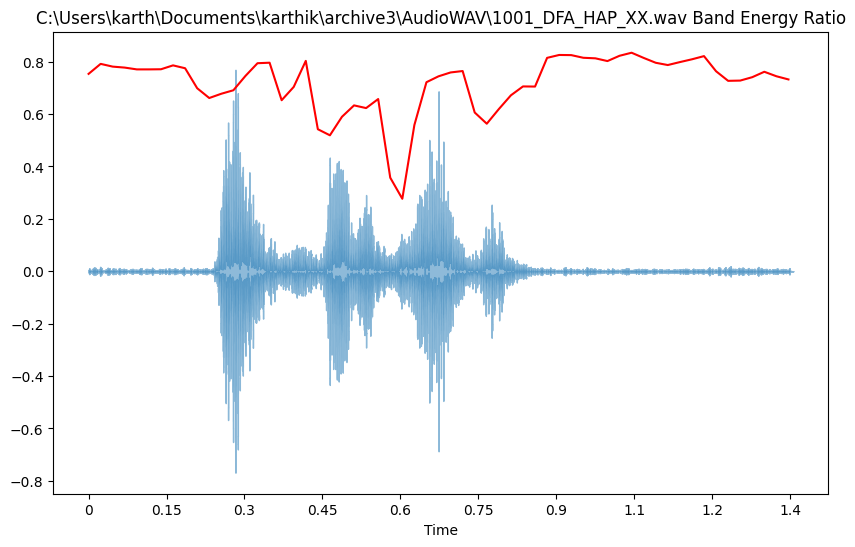

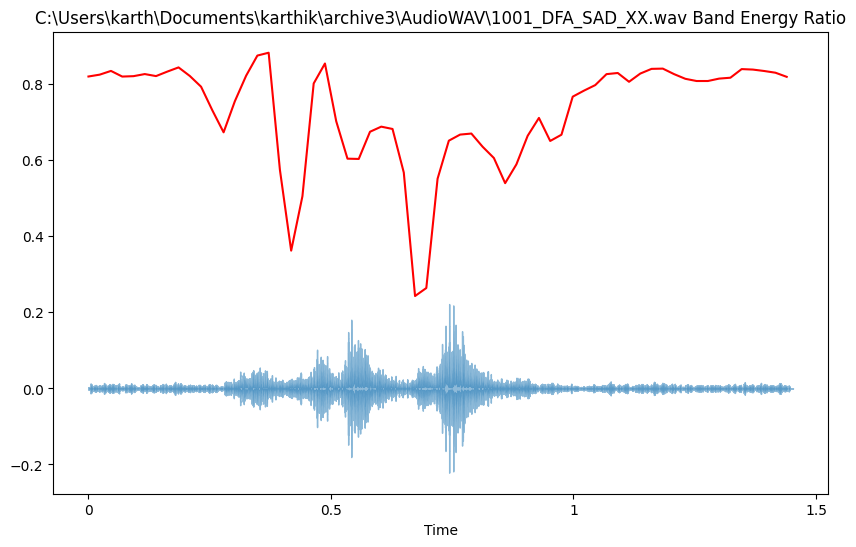

In [22]:
happy_BER = Band_Energy_Ratio(happy_audio_path, frame_size=2048, hop_len=512, split_frequency=2000)
sad_BER = Band_Energy_Ratio(sad_audio_path, frame_size=2048, hop_len=512, split_frequency=2000)

**Frequency Spectrogram Feature**

In [23]:
def Frequency_Spectrogram(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path, res_type='kaiser_best')  # Specify a different resampling method
    sig_stft = librosa.stft(signal, n_fft=frame_size, hop_length=hop_len)
    spec = np.abs(sig_stft) ** 2

    if visualise:
        plt.figure(figsize=(10, 6))
        librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), y_axis='log', x_axis='time')
        plt.title(audio_path.split("/")[-1] + " Frequency Spectrogram")
        plt.colorbar(format='%+2.0f dB')
        plt.show()

    return spec

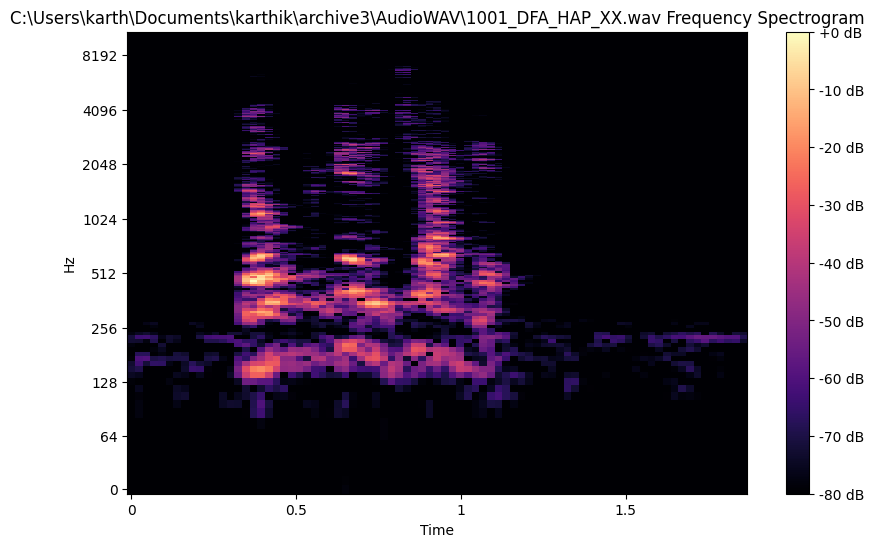

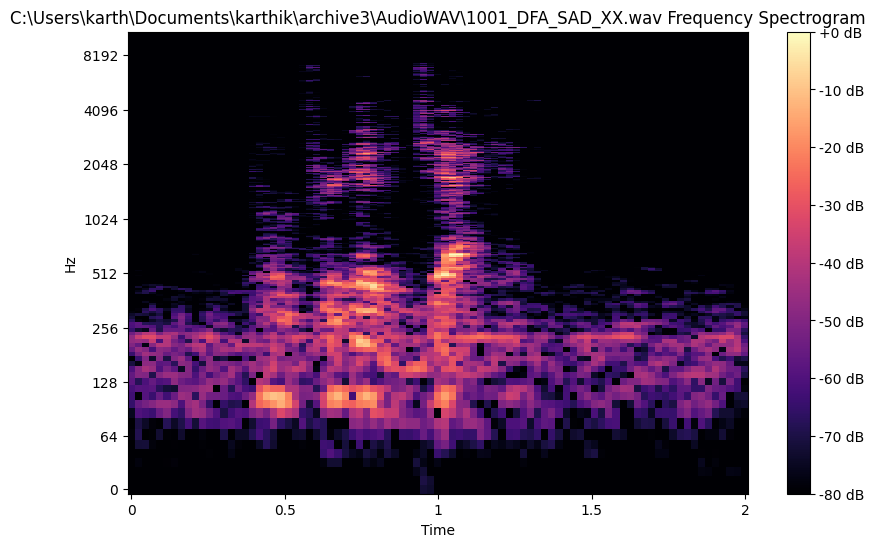

In [24]:
happy_freq_spec = Frequency_Spectrogram(happy_audio_path, frame_size=2048, hop_len=512)
sad_freq_spec = Frequency_Spectrogram(sad_audio_path, frame_size=2048, hop_len=512)

**Mel Spectrogram Feature**

In [25]:
def Mel_Spectrogram(audio_path, frame_size, hop_len, mel_band, visualise=True):
    signal, sr = librosa.load(audio_path, res_type='kaiser_best')

    # Calculate the Mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=frame_size, hop_length=hop_len, n_mels=mel_band)

    # Convert to decibels (log scale)
    db_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    if visualise:
        plt.figure(figsize=(10,6))
        librosa.display.specshow(db_mel_spec, sr=sr, hop_length=hop_len, x_axis='time', y_axis='mel')
        plt.colorbar(format="%+2.f")
        plt.title(audio_path.split("/")[-1] + " Mel Spectrogram")
        plt.show()
    
    return db_mel_spec



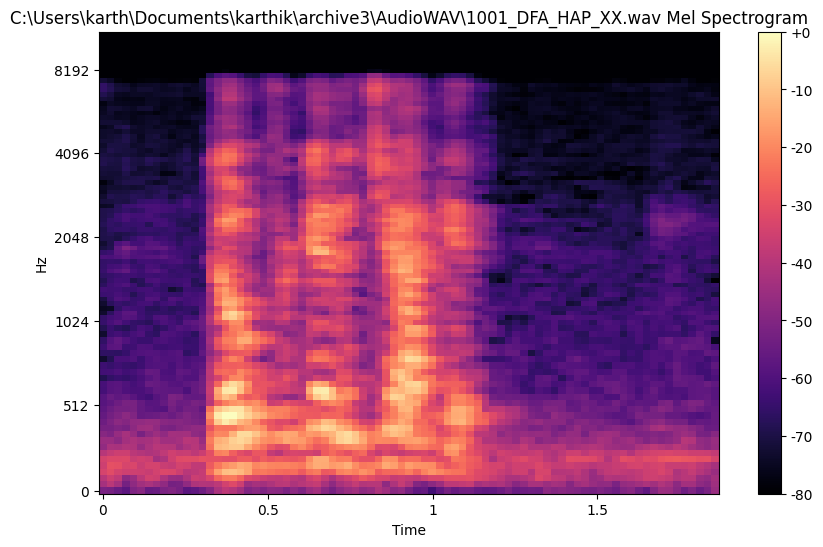

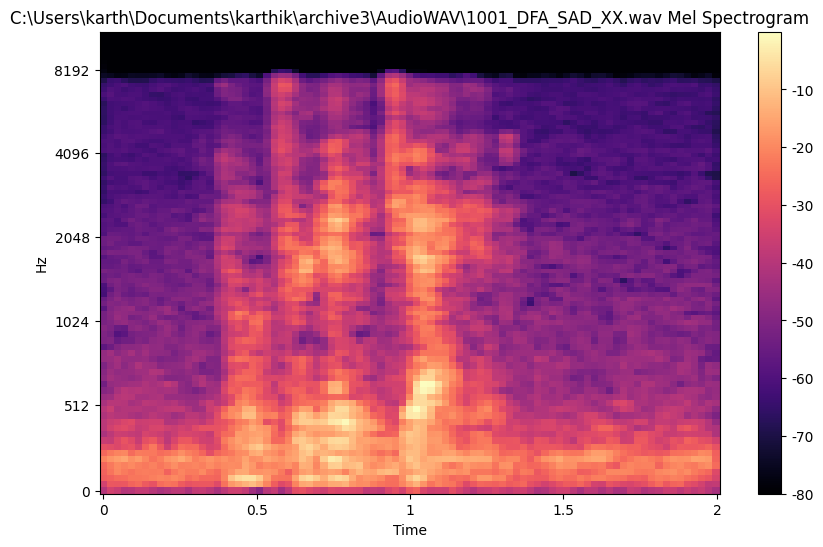

In [26]:
happy_mel_spec = Mel_Spectrogram(happy_audio_path, frame_size=2048, hop_len=512, mel_band=90)
sad_mel_spec = Mel_Spectrogram(sad_audio_path, frame_size=2048, hop_len=512, mel_band=90)

**Mel Frequency Cepstral Coefficients Feature**

In [27]:
def Mel_Frequency_Cepstral_Coefficients(audio_path, frame_size, hop_len, mfcc_num, visualise=True):
    signal, sr = librosa.load(audio_path, res_type='kaiser_best')

    mfcc_spec = librosa.feature.mfcc(y=signal, sr=sr, n_fft=frame_size, hop_length=hop_len, n_mfcc=mfcc_num)
    delta1_mfcc = librosa.feature.delta(mfcc_spec, order=1)
    delta2_mfcc = librosa.feature.delta(mfcc_spec, order=2)
        
    mfcc_features = np.concatenate((np.mean(mfcc_spec, axis=1), np.mean(delta1_mfcc, axis=1), np.mean(delta2_mfcc, axis=1)))
    
    if visualise:
        plt.figure(figsize=(10,16))
        
        plt.subplot(3,1,1)
        librosa.display.specshow(mfcc_spec, hop_length=hop_len, x_axis='time', y_axis='mel')
        plt.colorbar(format="%+2.f")
        plt.title(audio_path.split("/")[-1] + " MFCC Spectrogram")
        
        plt.subplot(3,1,2)
        librosa.display.specshow(delta1_mfcc, hop_length=hop_len, x_axis='time', y_axis='mel')
        plt.colorbar(format="%+2.f")
        plt.title(audio_path.split("/")[-1] + " Delta_1 MFCC Spectrogram")
        
        plt.subplot(3,1,3)
        librosa.display.specshow(delta2_mfcc, hop_length=hop_len, x_axis='time', y_axis='mel')
        plt.colorbar(format="%+2.f")
        plt.title(audio_path.split("/")[-1] + " Delta_2 MFCC Spectrogram")
        
        plt.show()
    
    return mfcc_features

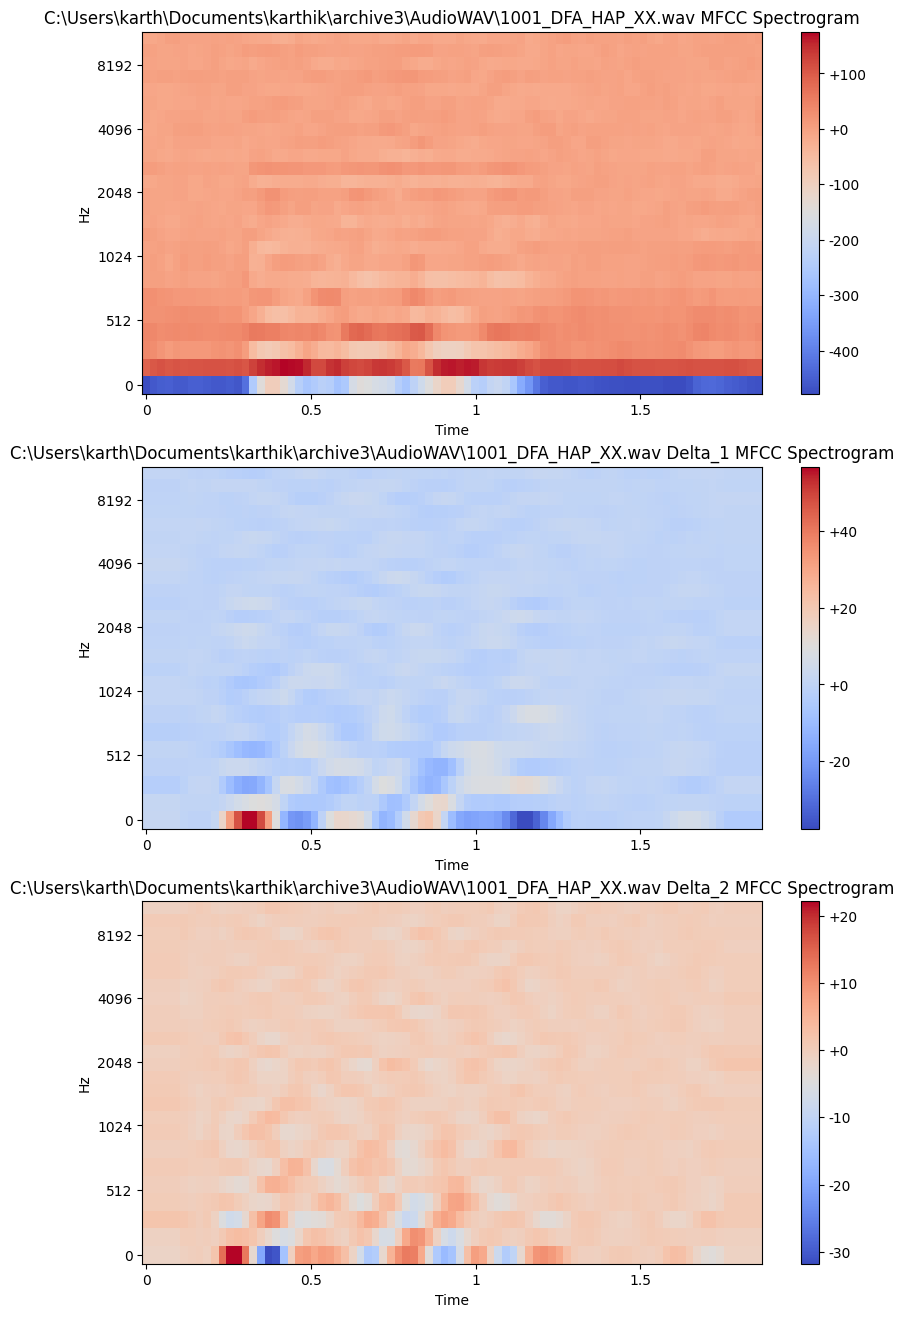

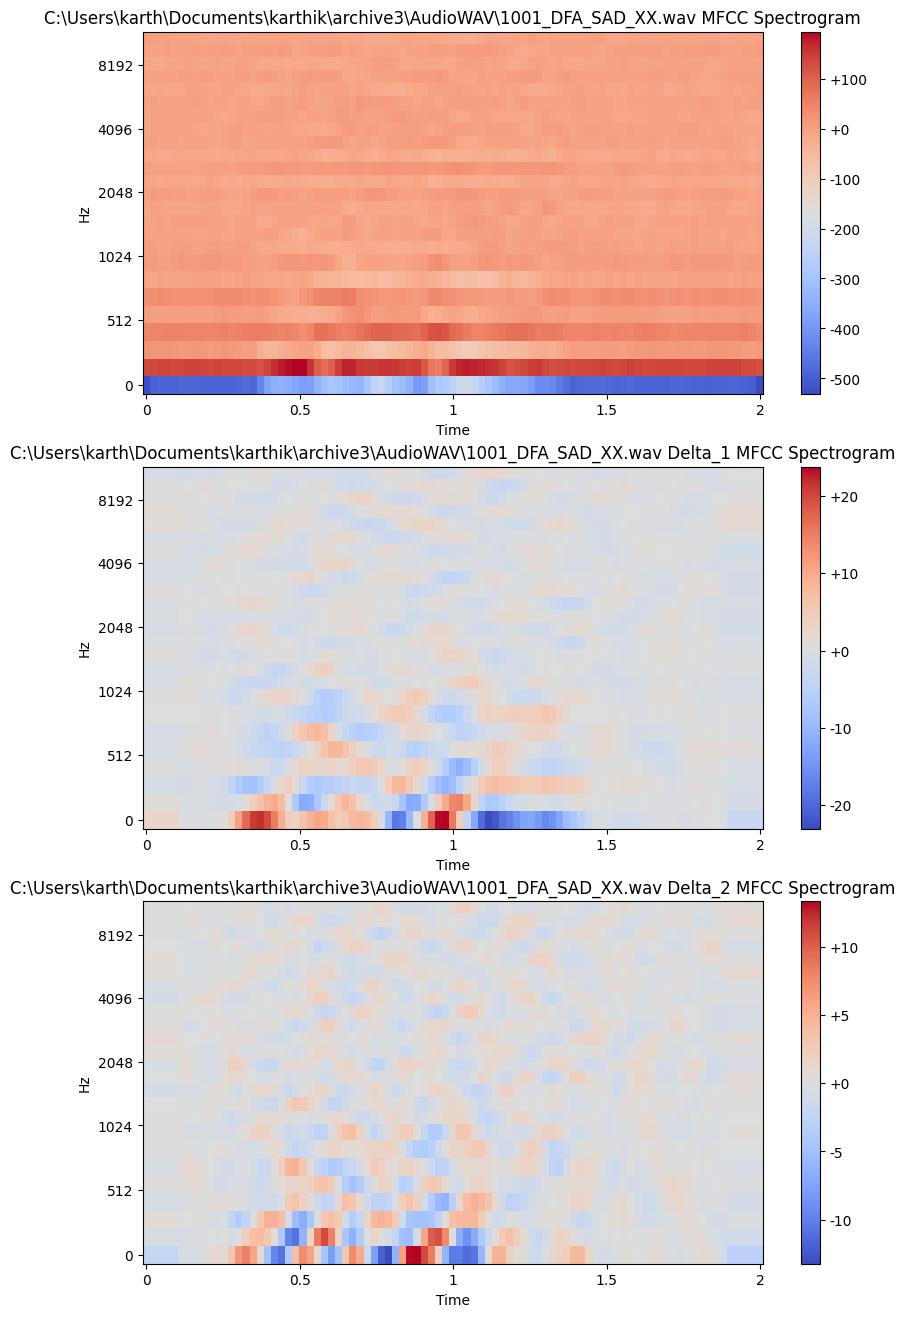

In [28]:
happy_mfcc = Mel_Frequency_Cepstral_Coefficients(happy_audio_path, frame_size=2048, hop_len=512, mfcc_num=25)
sad_mfcc = Mel_Frequency_Cepstral_Coefficients(sad_audio_path, frame_size=2048, hop_len=512, mfcc_num=25)

# Audio Features Extraction

In [29]:
def audio_features(path, frame_size, hop_len, mfcc_num):
    audio_files = os.listdir(path)
    
    audios_mfcc = []
    audios_zcr = []
    audios_rmse = []
    audios_label = []
    for audio_name in audio_files:
        mfcc = Mel_Frequency_Cepstral_Coefficients(path + '/' + audio_name, frame_size=frame_size, hop_len=hop_len, mfcc_num=mfcc_num, visualise=False)
        zcr = np.mean(Zero_Crossing_Rate(path + '/' + audio_name, frame_size=frame_size, hop_len=hop_len, visualise=False))
        rmse = np.mean(Root_Mean_Square_Energy(path + '/' + audio_name, frame_size=frame_size, hop_len=hop_len, visualise=False))
        audios_mfcc.append(mfcc)
        audios_zcr.append(zcr)
        audios_rmse.append(rmse)
        label = audio_name.split("_")[2]
        audios_label.append(label)
          
    #Create a Pandas DataFrame Using Audio Features, Name and Label of audios
    au_features = np.column_stack((audios_mfcc, audios_zcr, audios_rmse))
    df = pd.DataFrame(au_features)
    df.insert(loc=0, column='name', value=audio_files)
    df['class'] = audios_label
    
    return df

Here, I use only Crema Dataset.

In [30]:
crema_path = r"C:\Users\karth\Documents\karthik\archive3\AudioWAV"

df = audio_features(crema_path, frame_size=2048, hop_len=512, mfcc_num=20)
df.head()

,name,0,1,2,3,4,5,6,7,8,...,53,54,55,56,57,58,59,60,61,class
0,1001_DFA_ANG_XX.wav,-344.070160,123.578468,-12.137379,41.177151,-2.905607,13.556086,-17.609064,-5.014080,-8.538193,...,0.035256,0.007230,0.040833,0.083195,0.067777,0.049198,0.012005,0.101868,0.101868,ANG
1,1001_DFA_DIS_XX.wav,-391.156952,137.478500,-20.730135,55.133484,-1.362616,22.416723,-22.356289,5.037747,-8.432620,...,-0.027578,0.014704,0.020889,-0.009235,0.018554,0.019505,0.001660,0.093061,0.093061,DIS
2,1001_DFA_FEA_XX.wav,-353.697144,117.784874,-5.076811,34.020809,4.950703,11.070600,-16.034914,-1.490495,-5.429196,...,-0.009497,-0.037217,-0.046384,0.006423,0.025575,0.019556,-0.006289,0.084286,0.084286,FEA
3,1001_DFA_HAP_XX.wav,-339.766388,122.683655,-14.825016,41.138290,3.803923,9.775388,-20.466356,-1.674139,-7.897540,...,0.034106,0.037010,-0.027192,-0.033578,-0.025271,-0.020192,0.033986,0.084878,0.084878,HAP
4,1001_DFA_NEU_XX.wav,-370.031586,126.838776,-6.678929,40.750210,6.421874,12.087253,-11.939016,-4.258397,-8.134416,...,0.001944,-0.001515,0.061393,0.066671,0.035622,0.023725,-0.005629,0.082031,0.082031,NEU


Let's check the distribution of classes for avoiding imbalanced data problems:

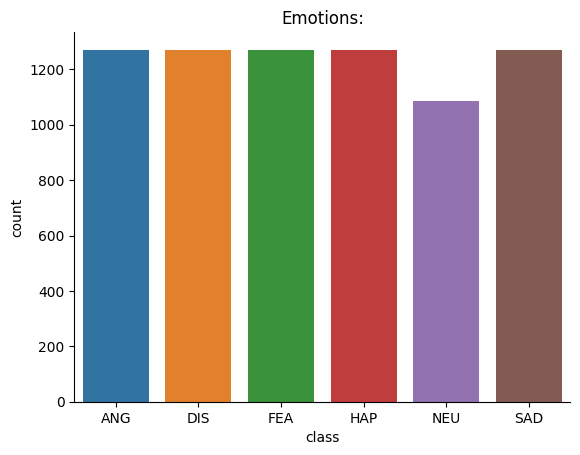

In [31]:
plt.title("Emotions:")
sns.countplot(x=df["class"])
sns.despine(top=True, right=True, left=False, bottom=False)

# Model Preprocessing

In [32]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

#Data Normalization
X = df.drop(['name','class'], axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#Expand The Shape Of Train Data To Feed Conv Layers
X = np.expand_dims(X, axis=-1)

#label one_hot encoding
y = np.array(df['class'])
y = np.reshape(y, (-1,1))
y = OneHotEncoder().fit_transform(y).toarray()

#splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Model

In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(filters=hp.Choice('filters', [16,32,64]),
                            kernel_size=3,
                            activation='relu',
                            kernel_initializer='he_normal',
                            padding='same'))
    model.add(layers.MaxPooling1D(3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    for i in range(hp.Int('num_layers', 3, 6)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32),
                               activation='relu'))
        model.add(layers.BatchNormalization())
    model.add(layers.Dense(6, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 2e-3, 4e-3])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [34]:
tuner = kt.Hyperband(hypermodel=build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=3,
                     hyperband_iterations=3,
                     seed=42,
                     overwrite=True)

In [35]:
tuner.search(x=X_train, 
             y=y_train, 
             validation_split=0.2, 
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],
             epochs=30)

Trial 762 Complete [00h 00m 21s]
val_accuracy: 0.39714524149894714

Best val_accuracy So Far: 0.4307304918766022
Total elapsed time: 20h 10m 17s
INFO:tensorflow:Oracle triggered exit


In [36]:
best_hp = tuner.get_best_hyperparameters()[0]
final_model = tuner.hypermodel.build(best_hp)

final_model_history = final_model.fit(x=X_train,
                                      y=y_train,
                                      validation_split=0.2, 
                                      callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],
                                      epochs=50)

Epoch 1/50
149/149 [==============================] - 4s 10ms/step - loss: 1.6322 - accuracy: 0.3232 - val_loss: 2.0411 - val_accuracy: 0.1746
Epoch 2/50
149/149 [==============================] - 1s 9ms/step - loss: 1.4847 - accuracy: 0.3887 - val_loss: 1.6841 - val_accuracy: 0.2838
Epoch 3/50
149/149 [==============================] - 2s 11ms/step - loss: 1.4355 - accuracy: 0.4087 - val_loss: 1.8161 - val_accuracy: 0.2603
Epoch 4/50
149/149 [==============================] - 2s 11ms/step - loss: 1.4072 - accuracy: 0.4441 - val_loss: 1.4817 - val_accuracy: 0.3762
Epoch 5/50
149/149 [==============================] - 2s 12ms/step - loss: 1.3765 - accuracy: 0.4469 - val_loss: 1.5442 - val_accuracy: 0.3846
Epoch 6/50
149/149 [==============================] - 1s 10ms/step - loss: 1.3523 - accuracy: 0.4572 - val_loss: 1.5911 - val_accuracy: 0.3602
Epoch 7/50
149/149 [==============================] - 2s 10ms/step - loss: 1.3253 - accuracy: 0.4786 - val_loss: 1.5405 - val_accuracy: 0.3829
